In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

df = pd.read_csv("result.csv",encoding='cp949')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   날짜                85 non-null     object 
 1   일누적 자외선 A(MJ/m2)  85 non-null     float64
 2   일최대 자외선 B(W/m2 )  85 non-null     float64
 3   평균 오존전량(DU)       85 non-null     float64
 4   전운량(10분위)         85 non-null     int64  
 5   자외선지수             85 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.1+ KB
None


In [5]:
z = df['일최대 자외선 B(W/m2 )']*df['평균 오존전량(DU)']

array([[<AxesSubplot:xlabel='일누적 자외선 A(MJ/m2)', ylabel='일누적 자외선 A(MJ/m2)'>,
        <AxesSubplot:xlabel='일최대 자외선 B(W/m2 )', ylabel='일누적 자외선 A(MJ/m2)'>,
        <AxesSubplot:xlabel='평균 오존전량(DU)', ylabel='일누적 자외선 A(MJ/m2)'>,
        <AxesSubplot:xlabel='전운량(10분위)', ylabel='일누적 자외선 A(MJ/m2)'>,
        <AxesSubplot:xlabel='자외선지수', ylabel='일누적 자외선 A(MJ/m2)'>],
       [<AxesSubplot:xlabel='일누적 자외선 A(MJ/m2)', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='일최대 자외선 B(W/m2 )', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='평균 오존전량(DU)', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='전운량(10분위)', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='자외선지수', ylabel='일최대 자외선 B(W/m2 )'>],
       [<AxesSubplot:xlabel='일누적 자외선 A(MJ/m2)', ylabel='평균 오존전량(DU)'>,
        <AxesSubplot:xlabel='일최대 자외선 B(W/m2 )', ylabel='평균 오존전량(DU)'>,
        <AxesSubplot:xlabel='평균 오존전량(DU)', ylabel='평균 오존전량(DU)'>,
        <AxesSubplot:xlabel='전운량(10분위)', ylabel='평균 오존전량(DU)'>,
        <Axe

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

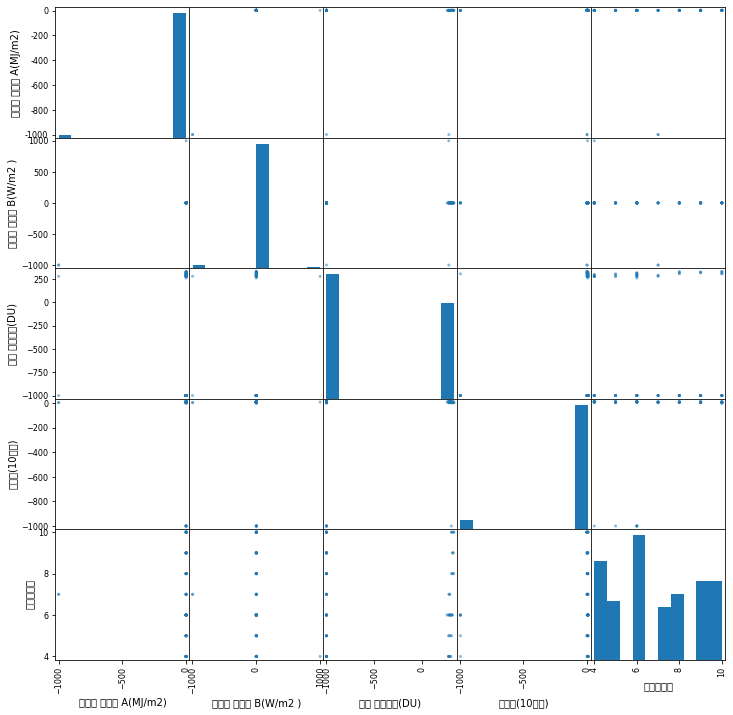

In [6]:
import matplotlib.pylab as plt

pd.plotting.scatter_matrix(df,figsize=(12,12), hist_kwds={'bins':10})

<AxesSubplot:ylabel='Frequency'>

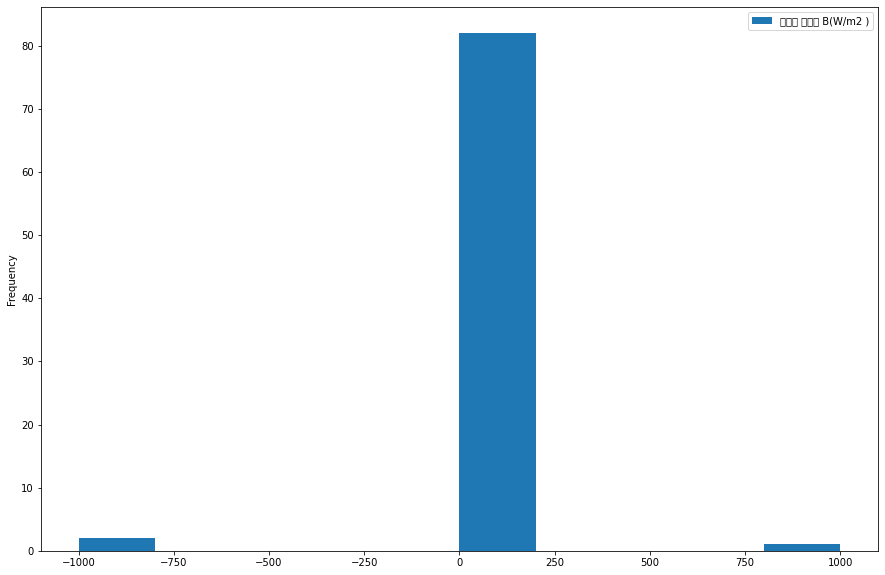

In [7]:
df.plot(kind='hist', x = '평균 오존전량(DU)' , y='일최대 자외선 B(W/m2 )', figsize=(15,10))

In [8]:

#결측값 평균값 대체
df = df.replace(-999, np.NaN)
df.loc[df['평균 오존전량(DU)'] != df['평균 오존전량(DU)'], '평균 오존전량(DU)'] = df['평균 오존전량(DU)'].mean()

za=df[['일최대 자외선 B(W/m2 )']]
ozon=df[['평균 오존전량(DU)']]


In [18]:
import statsmodels.api as sm   
ozon1 = sm.add_constant(ozon, has_constant = "add")  #상수항 추가
model1 = sm.OLS(za, ozon1)
fitted_model1 = model1.fit()


In [19]:
fitted_model1.summary()
#결과해석 
#r-squared 이 0.03로 설명력이 크지않다는것을 알 수있고 이는 더 높은 영향력을 찾을 변수를 추가하거나 다른 변수를 선택할 필요가 있다고 판단된다.   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  자외선지수   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     35.97
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           9.72e-07
Time:                        22:30:41   Log-Likelihood:                -61.565
No. Observations:                  35   AIC:                             127.1
Df Residuals:                      33   BIC:                             130.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.9338      3.932     -4.307      0.000     -24.933      -8.935
평균 오존전량(DU)     0.0787      0.013      5.997      0.000       0.052       0.105
==============================================================================
Omnibus:                        0.815   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.801
Skew:                           0.142   Prob(JB):                        0.670
Kurtosis:                       2.315   Cond. No.                     4.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
fitted_model1.params    #회귀계수출력

const         -16.933764
평균 오존전량(DU)     0.078677
dtype: float64

In [21]:
pred0 = np.dot(ozon1, fitted_model1.params) #y hat 적합값(예측값) 계산

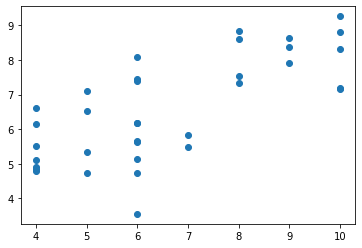

In [22]:
plt.scatter(za, pred0)

In [23]:
#결측값제거 
df = pd.read_csv("result.csv",encoding='cp949')
df = df.replace(-999, np.NaN)


In [24]:
df.head(10)

,날짜,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),전운량(10분위),자외선지수
0,2020-06-01,1.196,0.200,NaN,2.0,5
1,2020-06-02,0.426,0.114,NaN,10.0,7
2,2020-06-03,0.802,0.160,NaN,10.0,7
3,2020-06-04,0.658,0.110,NaN,7.0,9
4,2020-06-05,0.924,0.173,325.0,7.0,9
5,2020-06-06,1.178,0.170,NaN,3.0,9
6,2020-06-07,1.273,0.187,NaN,4.0,9
7,2020-06-08,1.380,0.179,NaN,2.0,10
8,2020-06-09,1.436,0.201,306.1,1.0,10
9,2020-06-10,1.178,0.243,NaN,6.0,9


In [25]:
df_drop_row = df.dropna(axis=0)
df_drop_row

,날짜,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),전운량(10분위),자외선지수
4,2020-06-05,0.924,0.173,325.0,7.0,9
8,2020-06-09,1.436,0.201,306.1,1.0,10
14,2020-06-15,1.296,0.203,315.7,2.0,9
21,2020-06-22,1.490,0.203,327.1,1.0,10
25,2020-06-26,1.335,0.211,309.2,6.0,6
31,2020-07-02,1.262,0.211,306.6,4.0,10
35,2020-07-06,1.292,0.206,308.6,6.0,8
37,2020-07-08,1.418,0.194,333.0,2.0,10
39,2020-07-10,1.098,0.226,324.8,6.0,8
44,2020-07-15,1.272,0.228,321.6,9.0,9


In [14]:
za=df_drop_row[['자외선지수']]
ozon=df_drop_row[['평균 오존전량(DU)']]

In [15]:
import statsmodels.api as sm   #결측값 제거후 선형회귀
ozon1 = sm.add_constant(ozon, has_constant = "add")  #상수항 추가
model1 = sm.OLS(za, ozon1)
fitted_model1 = model1.fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
fitted_model1.summary()
#결과해석 
#r-squared 이 0.087로 설명력이 크지않다는것을 알 수있고 이는 더 높은 영향력을 찾을 변수를 추가하거나 다른 변수를 선택할 필요가 있다고 판단된다.   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       일최대 자외선 B(W/m2 )   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.556
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.214
Time:                        17:52:44   Log-Likelihood:                -1139.2
No. Observations:                 201   AIC:                             2282.
Df Residuals:                     199   BIC:                             2289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.0014     40.317      1.364      0.174     -24.503     134.506
평균 오존전량(DU)    -0.1520      0.122     -1.247      0.214      -0.392       0.088
==============================================================================
Omnibus:                      443.721   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           318242.818
Skew:                          13.907   Prob(JB):                         0.00
Kurtosis:                     195.939   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
pred0 = np.dot(ozon1, fitted_model1.params) #y hat 적합값(예측값) 계산

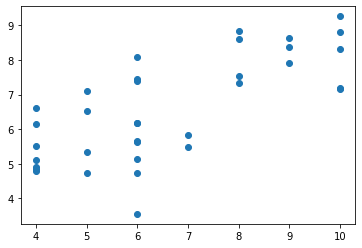

In [17]:
plt.scatter(za, pred0)

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)


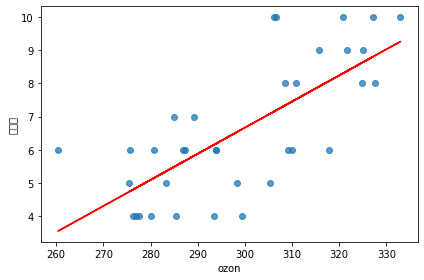

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
 
자외선 = df_drop_row['자외선지수']
오존 = df_drop_row['평균 오존전량(DU)']

plt.scatter(오존, 자외선 ,alpha=0.75)

plt.ylabel('자외선')
plt.xlabel('ozon')


line_fitter = LinearRegression()
line_fitter.fit(오존.values.reshape(-1,1), 자외선)
plt.plot(오존,line_fitter.predict(오존.values.reshape(-1,1)),'r')
plt.tight_layout()
plt.show()


In [46]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
df = pd.read_csv("result.csv",encoding='cp949')
df = df.replace(-999, np.NaN)
df_drop_row = df.dropna(axis=0)
df_drop_row

# X and y after excluding missing values
X=df_drop_row[['자외선지수']]
y=df_drop_row[['평균 오존전량(DU)']]

# fitting linear regression model using non-missing values
lin_reg_model = lin_reg.fit(X, y)

In [47]:
#(2) 선형회귀모형으로 부터 추정값 계산하기 (prediction using linear regression model)
y_pred = lin_reg_model.predict(df_drop_row.loc[:, ['자외선지수']])

y_pred

array([[315.02880886],
       [321.65747922],
       [315.02880886],
       [321.65747922],
       [295.14279778],
       [321.65747922],
       [308.4001385 ],
       [321.65747922],
       [308.4001385 ],
       [315.02880886],
       [321.65747922],
       [308.4001385 ],
       [288.51412742],
       [295.14279778],
       [281.88545706],
       [295.14279778],
       [308.4001385 ],
       [295.14279778],
       [295.14279778],
       [295.14279778],
       [281.88545706],
       [281.88545706],
       [281.88545706],
       [281.88545706],
       [295.14279778],
       [281.88545706],
       [295.14279778],
       [295.14279778],
       [281.88545706],
       [295.14279778],
       [288.51412742],
       [301.77146814],
       [288.51412742],
       [301.77146814],
       [288.51412742]])

In [49]:
df['평균 오존전량(DU)'].fillna(pd.Series(y_pred.flatten()), inplace=True) #결측값 채우기 

In [50]:
df

,날짜,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),전운량(10분위),자외선지수
0,2020-06-01,1.196,0.200,315.028809,2.0,5
1,2020-06-02,0.426,0.114,321.657479,10.0,7
2,2020-06-03,0.802,0.160,315.028809,10.0,7
3,2020-06-04,0.658,0.110,321.657479,7.0,9
4,2020-06-05,0.924,0.173,325.000000,7.0,9
...,...,...,...,...,...,...
80,2020-08-20,NaN,NaN,NaN,3.0,7
81,2020-08-21,1.216,0.194,289.300000,4.0,7
82,2020-08-22,0.667,0.113,298.300000,9.0,5
83,2020-08-23,1.305,0.213,285.000000,6.0,7


In [52]:
#아예 관측안한날 결측값이므로 제거
df_new = df.dropna(axis=0)

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)


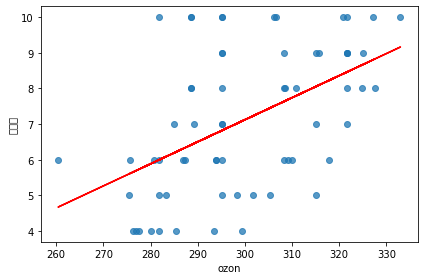

In [53]:
#결측값 채운뒤
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
 
자외선 = df_new['자외선지수']
오존 = df_new['평균 오존전량(DU)']

plt.scatter(오존, 자외선 ,alpha=0.75)

plt.ylabel('자외선')
plt.xlabel('ozon')


line_fitter = LinearRegression()
line_fitter.fit(오존.values.reshape(-1,1), 자외선)
plt.plot(오존,line_fitter.predict(오존.values.reshape(-1,1)),'r')
plt.tight_layout()
plt.show()